In [26]:
from datetime import datetime
import os
os.environ['MPLCONFIGDIR'] = "/wrk-vakka/users/hajaalin/tmp_mplconfigdir"
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt, rcParams

In [5]:
def read_output_files(dirs):
    files = []
    for d in dirs:
        files.extend(Path(d).glob('*/*.csv'))

    scores_all = []

    for f in files:
        df = pd.read_csv(f)
        df['dir'] = str(Path(f).parent)
        df['run'] = str(Path(f).parent.parent.name)
        scores_all.append(df)

    return pd.concat(scores_all)

def load_shap_values(output_shap):
    list_idx_train = np.load(output_shap + '/list_idx_train.npy', allow_pickle=True)
    list_idx_test = np.load(output_shap + '/list_idx_test.npy', allow_pickle=True)
    list_X_test = np.load(output_shap + '/list_X_test.npy', allow_pickle=True)
    list_shap_deep = np.load(output_shap + '/list_shap_deep.npy', allow_pickle=True)
    list_shap_grad = np.load(output_shap + '/list_shap_grad.npy', allow_pickle=True)
    list_acc = np.load(output_shap + '/list_accuracy.npy', allow_pickle=True)
    features = np.load(output_shap + '/features.npy', allow_pickle=True)
    
    return list_idx_train, list_idx_test, list_X_test, list_shap_deep, list_shap_grad, list_acc, features

In [2]:
# I copied output.tgz to /wrk-vakka/group/lmu/projects/n_track_ML/output/
#!ls /wrk-vakka/group/lmu/projects/n_track_ML/output/shap/k3_14_28_depth1_nobn_adam00001b_all_20230714/202307141240 | wc -l
#!ls /wrk-vakka/group/lmu/projects/n_track_ML/output/shap/k3_14_28_depth1_nobn_adam00001b_all_20230714/202307141240/273260527

#!tar -tvf /wrk-vakka/group/lmu/projects/n_track_ML/output/output.tgz | grep 202307141240.csv | wc -l
!ls best_adam_out/202307141240


cv_k3_14_28_depth1_nobn_adam00001b_all_20230714_k3_14_28_e100_202307141240.csv
cv_k3_14_28_depth1_nobn_adam00001b_all_20230714_k3_14_28_e103_202307141240.csv
cv_k3_14_28_depth1_nobn_adam00001b_all_20230714_k3_14_28_e106_202307141240.csv
cv_k3_14_28_depth1_nobn_adam00001b_all_20230714_k3_14_28_e109_202307141240.csv
cv_k3_14_28_depth1_nobn_adam00001b_all_20230714_k3_14_28_e10_202307141240.csv
cv_k3_14_28_depth1_nobn_adam00001b_all_20230714_k3_14_28_e112_202307141240.csv
cv_k3_14_28_depth1_nobn_adam00001b_all_20230714_k3_14_28_e115_202307141240.csv
cv_k3_14_28_depth1_nobn_adam00001b_all_20230714_k3_14_28_e118_202307141240.csv
cv_k3_14_28_depth1_nobn_adam00001b_all_20230714_k3_14_28_e121_202307141240.csv
cv_k3_14_28_depth1_nobn_adam00001b_all_20230714_k3_14_28_e124_202307141240.csv
cv_k3_14_28_depth1_nobn_adam00001b_all_20230714_k3_14_28_e127_202307141240.csv
cv_k3_14_28_depth1_nobn_adam00001b_all_20230714_k3_14_28_e130_202307141240.csv
cv_k3_14_28_depth1_nobn_adam00001b_all_20230714_k3_14

In [3]:
#pip install seaborn

import numpy as np
import pandas as pd
import seaborn as sns

In [21]:
output_dir = 'best_adam_out/202307141241'
epochs_out = os.listdir(output_dir)
#epochs_out
test = pd.read_csv(output_dir + '/' + epochs_out[0])
test.head(10)

,accuracy,precision,recall,f1,repeat,cv,classifier,fset,kernel_size,epochs,job_id
0,0.528571,0.542857,0.527778,0.535211,1.0,"StratifiedGroupKFold(n_splits=4, random_state=...",InceptionTime,all,3_14_28,85,273260656
1,0.666667,0.843750,0.586957,0.692308,1.0,"StratifiedGroupKFold(n_splits=4, random_state=...",InceptionTime,all,3_14_28,85,273260656
2,0.557143,1.000000,0.225000,0.367347,1.0,"StratifiedGroupKFold(n_splits=4, random_state=...",InceptionTime,all,3_14_28,85,273260656
3,0.571429,0.482143,0.870968,0.620690,1.0,"StratifiedGroupKFold(n_splits=4, random_state=...",InceptionTime,all,3_14_28,85,273260656
4,0.492754,0.564103,0.550000,0.556962,2.0,"StratifiedGroupKFold(n_splits=4, random_state=...",InceptionTime,all,3_14_28,85,273260656
5,0.756757,0.909091,0.666667,0.769231,2.0,"StratifiedGroupKFold(n_splits=4, random_state=...",InceptionTime,all,3_14_28,85,273260656
6,0.577465,0.571429,0.666667,0.615385,2.0,"StratifiedGroupKFold(n_splits=4, random_state=...",InceptionTime,all,3_14_28,85,273260656
7,0.613333,0.538462,0.656250,0.591549,2.0,"StratifiedGroupKFold(n_splits=4, random_state=...",InceptionTime,all,3_14_28,85,273260656
8,0.680556,0.661765,1.000000,0.796460,3.0,"StratifiedGroupKFold(n_splits=4, random_state=...",InceptionTime,all,3_14_28,85,273260656
9,0.616438,0.588235,0.588235,0.588235,3.0,"StratifiedGroupKFold(n_splits=4, random_state=...",InceptionTime,all,3_14_28,85,273260656


In [22]:

epochs_list = []

for f in epochs_out:
    #print(f)
    df = pd.read_csv(output_dir + '/' + f)
    #print(df.shape)
    epochs_list.append(df)
#type(epochs_list[0])

master_df = pd.concat(epochs_list, ignore_index=True)
master_df.shape

(5360, 11)

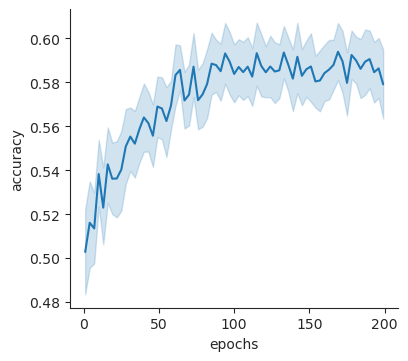

In [30]:
sns.set_style(style='ticks')
#rcParams['figure.dpi'] = 300 # uncomment for pub image
p = sns.relplot(
    data=master_df, kind="line", x='epochs', y='accuracy')
#p.set(ylim=(0.57, 0.66))
plt.gcf().set_size_inches(4, 3.5)
plt.show()

In [44]:
master_df[master_df['epochs']==199]['accuracy'].mean()
master_df[master_df['epochs'].between(100, 200)]['accuracy'].mean()

0.5864831572462202